In [1]:
import os
import cv2
import time
import argparse
import numpy as np

from detector import build_detector
from utils.parser import get_config

In [2]:
parser = argparse.ArgumentParser()
parser.add_argument("VIDEO_PATH", type=str)
parser.add_argument("--config_detection", type=str, default="./configs/yolov3.yaml")
parser.add_argument("--config_deepsort", type=str, default="./configs/deep_sort.yaml")
# parser.add_argument("--ignore_display", dest="display", action="store_false", default=True)
parser.add_argument("--display", action="store_true")
parser.add_argument("--frame_interval", type=int, default=1)
parser.add_argument("--display_width", type=int, default=800)
parser.add_argument("--display_height", type=int, default=600)
parser.add_argument("--save_path", type=str, default="./output/")
parser.add_argument("--cpu", dest="use_cuda", action="store_false", default=True)
parser.add_argument("--camera", action="store", dest="cam", type=int, default="-1")
args =  parser.parse_known_args()[0]
cfg = get_config()
cfg.merge_from_file(args.config_detection)

/home/pubix/University/IoT/deep_sort_pytorch/utils/parser.py:23: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.update(yaml.load(fo.read()))


In [3]:
detector = build_detector(cfg, use_cuda=False)

In [4]:
class_names = detector.class_names

In [6]:
ori_im = cv2.imread('input/input.png')
im = cv2.cvtColor(ori_im, cv2.COLOR_BGR2RGB)

# do detection
bbox_xywh, cls_conf, cls_ids = detector(im)

In [12]:
(cls_ids==0).any()

True

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# select person class
mask = cls_ids == 0

bbox_xywh = bbox_xywh[mask]
# bbox dilation just in case bbox too small, delete this line if using a better pedestrian detector
bbox_xywh[:, 3:] *= 1.2
cls_conf = cls_conf[mask]

In [8]:
for i, c in enumerate(cls_ids):
    if c == 0:
        x1, y1,w,h = bbox_xywh[i]
        
        x2 = int(x1+(w/2))
        y2 = int(y1+(h/2))
        
        x1 = int(x1-(w/2))
        y1 = int(y1-(h/2))
        cv2.rectangle(im,(x1, y1),(x2,y2),(255,255,255),3)


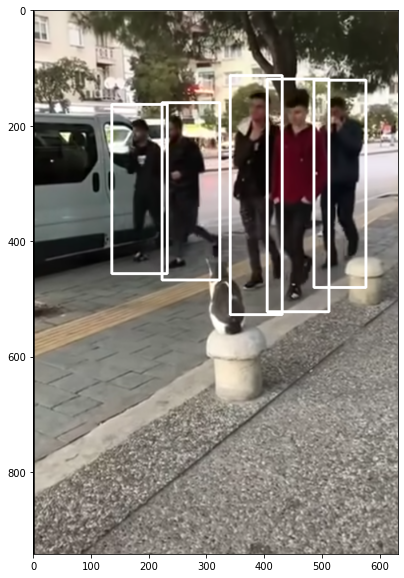

In [9]:
plt.figure(figsize=[10,10])
plt.imshow(im)

## 